In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline

In [216]:
# Making a list of missing value types
missing_values = ["unknown"]

# load banking dataset
df = pd.read_csv("bank-additional-full.csv", delimiter = ';', na_values = missing_values)

In [217]:
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,NaN,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [218]:
# view column names
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [219]:
# view shape of DataFrame
df.shape

(41188, 21)

In [220]:
# print information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             40858 non-null  object 
 2   marital         41108 non-null  object 
 3   education       39457 non-null  object 
 4   default         32591 non-null  object 
 5   housing         40198 non-null  object 
 6   loan            40198 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

#### Data Cleaning

In [221]:
# Checking for missing values
# check to see the number of missing values in each column and the percentage of missing values they contribute to. 

total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum() / df.isnull().count()).sort_values(ascending=False)

missing_data = pd.concat([total,percent], axis=1, keys=['Total','Percent'])
missing_data

,Total,Percent
default,8597,0.208726
education,1731,0.042027
housing,990,0.024036
loan,990,0.024036
job,330,0.008012
marital,80,0.001942
age,0,0.000000
poutcome,0,0.000000
nr.employed,0,0.000000
euribor3m,0,0.000000


In [222]:
# find duplicate rows
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
41183    False
41184    False
41185    False
41186    False
41187    False
Length: 41188, dtype: bool

In [223]:
# use the DataFrame.duplicated() method to return a series of boolean values
duplicate_list = df.duplicated().tolist()

if (True in duplicate_list):
    print ("Duplicate row found")

Duplicate row found


In [224]:
# Select duplicate rows except first occurrence based on all columns
duplicate_rows = df[df.duplicated()]

duplicate_rows

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12261,36,retired,married,NaN,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20216,55,services,married,high.school,NaN,no,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


In [225]:
# dropping duplicate rows (keep first)
df.drop_duplicates(keep='last',inplace=True)

In [226]:
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,NaN,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


##### Turning categorical variables into quantitative variables

In [227]:
from sklearn.impute import KNNImputer

In [228]:
# create dummy variable 
cat_variables = df[['job', 'marital','education','default','housing','loan','contact','month','day_of_week','poutcome','y']]


cat_dummies = pd.get_dummies(cat_variables, drop_first=False)

cat_dummies.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y_no,y_yes
0,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
1,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,1,0
2,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,1,0
3,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
4,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,1,0


In [229]:
# view column names for dummies
cat_dummies.columns

Index(['job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_divorced',
       'marital_married', 'marital_single', 'education_basic.4y',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'default_no', 'default_yes',
       'housing_no', 'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_wed', 'poutcome_failure',
       'poutcome_nonexistent', 'poutcome_success', 'y_no', 'y_yes'],
      dtype='object')

In [230]:
# drop the original columns from the dataframe and add the dummy variables
df = df.drop(['job', 'marital','education','default','housing','loan','contact','month','day_of_week','poutcome','y'], axis=1)
df = pd.concat([df, cat_dummies], axis=1)

df.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y_no,y_yes
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0


##### Another critical point here is that the KNN Imptuer is a distance-based imputation method and it requires us to normalize our data. 
##### Otherwise, the different scales of our data will lead the KNN Imputer to generate biased replacements for the missing values. 

##### For simplicity, we will use Scikit-Learn’s MinMaxScaler which will scale our variables to have values between 0 and 1.

In [231]:
from sklearn.preprocessing import MinMaxScaler

In [232]:
scaler = MinMaxScaler()

df = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)

df.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y_no,y_yes
0,0.481481,0.053070,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.493827,0.030297,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.246914,0.045954,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.283951,0.030704,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.481481,0.062424,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [233]:
#  KNN Imputation. import it from Scikit-Learn’s Impute package
from sklearn.impute import KNNImputer

# setting the parameter ‘n_neighbors’ as 5
imputer = KNNImputer(n_neighbors=5)

df = pd.DataFrame(imputer.fit_transform(df),columns = df.columns)

In [234]:
# Double checking for missing values 

total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum() / df.isnull().count()).sort_values(ascending=False)

missing_data = pd.concat([total,percent], axis=1, keys=['Total','Percent'])
missing_data

,Total,Percent
age,0,0.0
month_mar,0,0.0
default_yes,0,0.0
housing_no,0,0.0
housing_yes,0,0.0
loan_no,0,0.0
loan_yes,0,0.0
contact_cellular,0,0.0
contact_telephone,0,0.0
month_apr,0,0.0


##### As demonstrated above, our data frame no longer has missing values. 
##### They have been imputed as the means of k-Nearest Neighbor values.

#### Exploratory Data Analysis (EDA) 

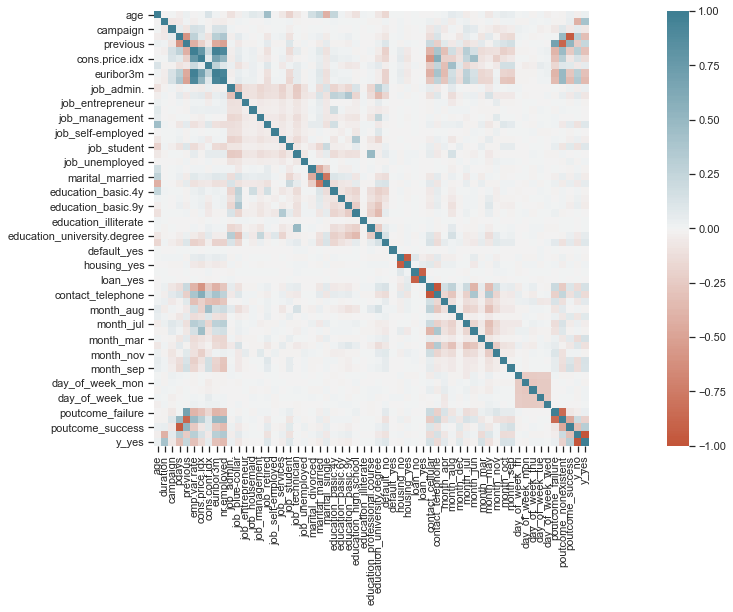

In [376]:
# Heat map to find the dependent variables. 
# One of the best ways to find the correlation between the features can be done using heat maps

plt.figure(figsize=(28,8))


corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
)

ax.yaxis.tick_left()
ax.xaxis.tick_bottom()

plt.show()

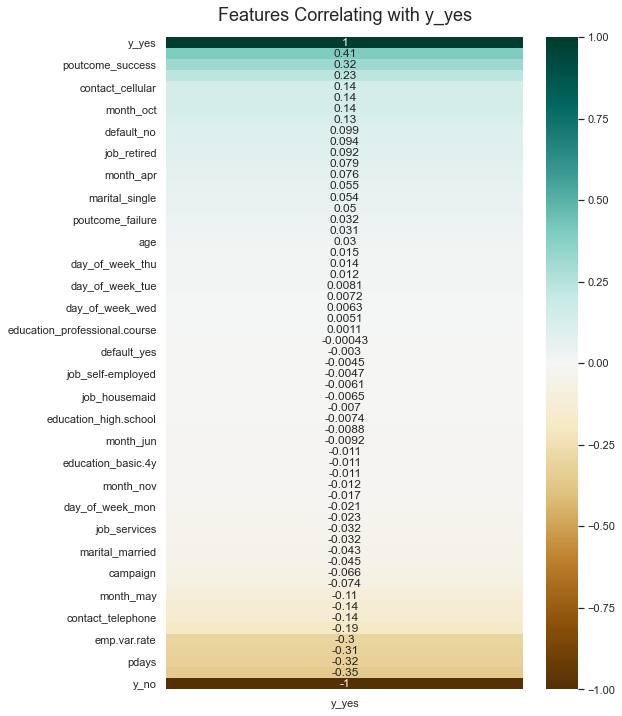

In [210]:
# Correlation of Independent Variables with the Dependent Variable
df.corr()[['y_yes']].sort_values(by='y_yes', ascending=False)

# The following code returns the correlation of all features with ‘y_yes’, 
# a single, dependent variable, sorted by ‘y_yes’ in a descending manner.

plt.figure(figsize=(8, 12))

heatmap = sns.heatmap(df.corr()[['y_yes']].sort_values(by='y_yes', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with y_yes', fontdict={'fontsize':18}, pad=16);

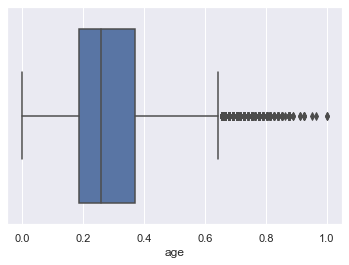

In [28]:
# boxplot showing the distribution of various ages in the dataset
sns.boxplot(x = 'age', data=df)

# show plot
plt.show()

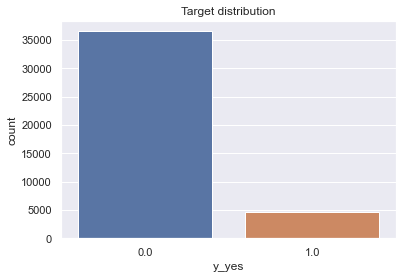

In [379]:
# individuals who subscribed to a term deposit vs those who did not 
sns.set_theme(style='darkgrid')

plt.title('Target distribution')

ax = sns.countplot(x='y_yes', data=df)

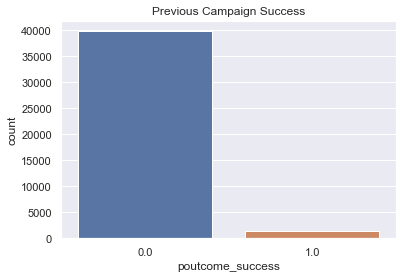

In [345]:
# individuals who subscribed to a term deposit vs those who did not (previous campaign)
sns.set_theme(style='darkgrid')

plt.title('Previous Campaign Success')

ax = sns.countplot(x='poutcome_success', data=df)

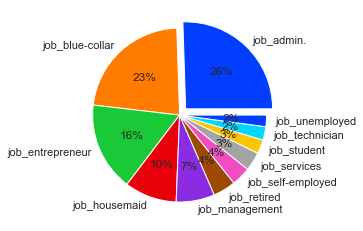

In [155]:

# declaring data
job_data = df[['job_admin.','job_blue-collar', 'job_entrepreneur', 'job_housemaid','job_management', 'job_retired', 'job_self-employed',
         'job_services','job_student', 'job_technician', 'job_unemployed']].sum().tolist()

job_keys = ['job_admin.','job_blue-collar', 'job_entrepreneur', 'job_housemaid','job_management', 'job_retired', 'job_self-employed',
         'job_services','job_student', 'job_technician', 'job_unemployed']

# define Seaborn color palette to use
palette_color = sns.color_palette('bright')

# change fig size
fig = plt.figure(figsize=(4, 4))

# declaring exploding pie
explode = [0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

# plotting data on chart
plt.pie(data, labels=keys, colors=palette_color, explode=explode, autopct='%.0f%%')
  
# displaying chart
plt.show()

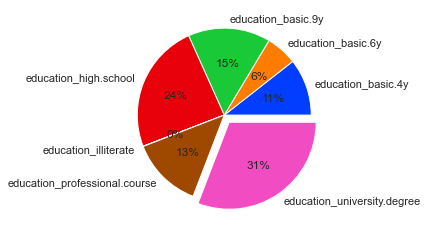

In [320]:

# declaring data
education_data = df[['education_basic.4y','education_basic.6y', 'education_basic.9y', 'education_high.school','education_illiterate', 'education_professional.course','education_university.degree']].sum().tolist()

education_keys = ['education_basic.4y','education_basic.6y', 'education_basic.9y', 'education_high.school','education_illiterate', 'education_professional.course','education_university.degree']

# define Seaborn color palette to use
palette_color = sns.color_palette('bright')

# declaring exploding pie
explode = [0.0, 0, 0, 0, 0, 0, 0.1]

# change fig size
fig = plt.figure(figsize=(4, 4))

# plotting data on chart
plt.pie(education_data, labels=education_keys, colors=palette_color, explode=explode, autopct='%.0f%%')
  
# displaying chart
plt.show()

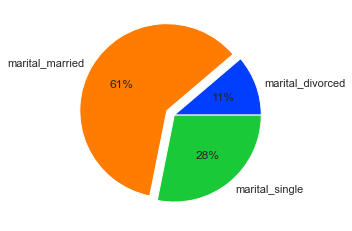

In [295]:

# declaring data
married_data = df[['marital_divorced','marital_married', 'marital_single']].sum().tolist()

married_keys = ['marital_divorced','marital_married', 'marital_single']

# define Seaborn color palette to use
palette_color = sns.color_palette('bright')

# change fig size
fig = plt.figure(figsize=(4, 4))

# declaring exploding pie
explode = [0, 0.1, 0]

# plotting data on chart
plt.pie(married_data, labels=married_keys, colors=palette_color, explode=explode, autopct='%.0f%%')
  
# displaying chart
plt.show()

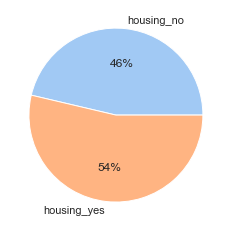

In [301]:
# declaring data
default_data = df[['housing_no', 'housing_yes']].sum().tolist()

default_keys = ['housing_no', 'housing_yes']

# define Seaborn color palette to use
palette_color = sns.color_palette('pastel')

# change fig size
fig = plt.figure(figsize=(4, 4))

# plotting data on chart
plt.pie(default_data, labels=default_keys, colors=palette_color, autopct='%.0f%%')

  
# displaying chart
plt.show()

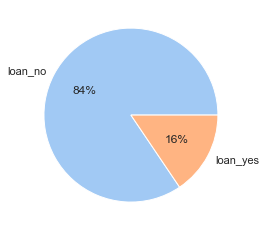

In [300]:
# declaring data
default_data = df[['loan_no', 'loan_yes']].sum().tolist()

default_keys = ['loan_no', 'loan_yes']

# define Seaborn color palette to use
palette_color = sns.color_palette('pastel')

# change fig size
fig = plt.figure(figsize=(4, 4))

# plotting data on chart
plt.pie(default_data, labels=default_keys, colors=palette_color, autopct='%.0f%%')

  
# displaying chart
plt.show()

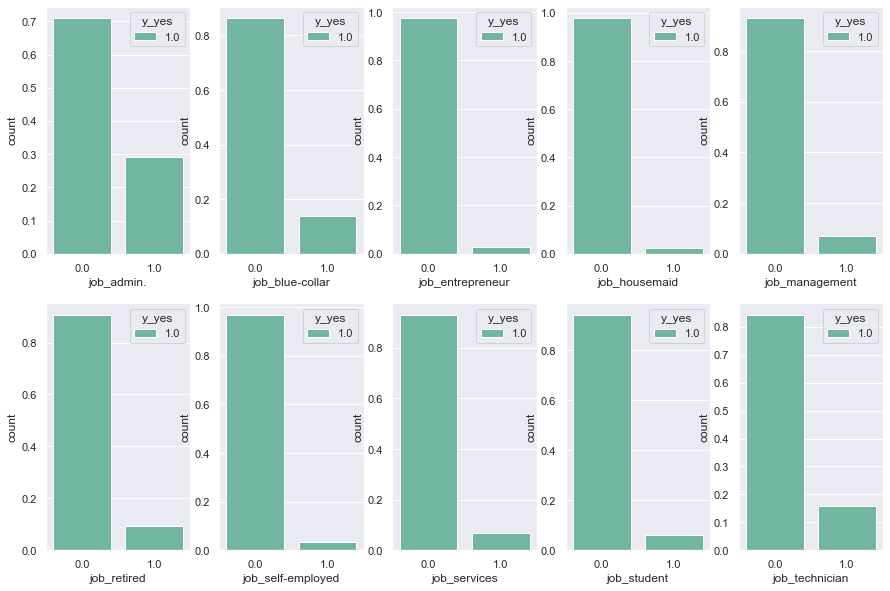

In [342]:
fig, axes = plt.subplots(2, 5, figsize=(15,10))
axes = [ax for axes_rows in axes for ax in axes_rows]

for i, c in enumerate(df[['job_admin.','job_blue-collar', 'job_entrepreneur', 'job_housemaid','job_management', 'job_retired', 'job_self-employed',
         'job_services','job_student', 'job_technician']]):
    
    #index of rows where target_col value is 0.0
    fltr = df['y_yes']==0.0
    
    #dataframe conraining rows and columns where target_col value is 1.0
    #fltr-index of rows where target_col value is 0.0
    #c-column name
    #taking the value count
    #resetting index as column name
    
    vc_b=df[~fltr][c].value_counts(normalize=True).reset_index().rename({'index':c,c:'count'}, axis=1)
    
     #setting target_col value to 1.0 respectively
    vc_b['y_yes']=1.0
    
    #combining into single dataframe
    df2 = pd.concat([vc_b]).reset_index(drop=True)
    
    #plotting
    sns.barplot(y='count', x=c, data=df2, hue='y_yes', palette='Set2', ax=axes[i])

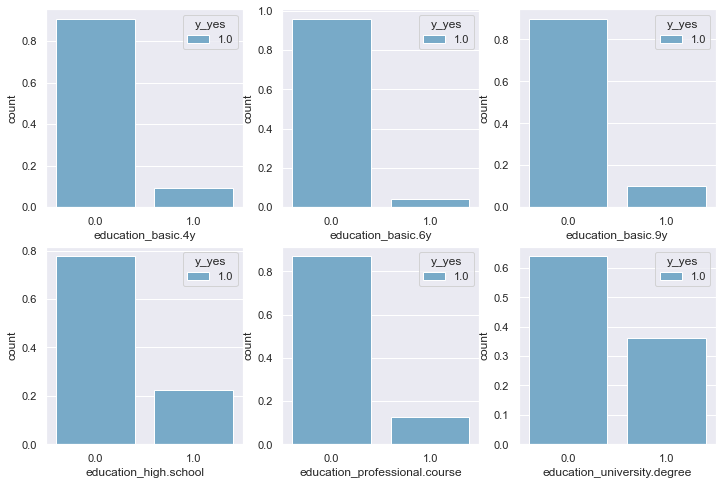

In [343]:
fig, axes = plt.subplots(2, 3, figsize=(12,8))
axes = [ax for axes_rows in axes for ax in axes_rows]

for i, c in enumerate(df[['education_basic.4y','education_basic.6y', 'education_basic.9y', 'education_high.school',
                          'education_professional.course','education_university.degree']]):
    
    #index of rows where target_col value is 0.0
    fltr = df['y_yes']==0.0
    
    #dataframe conraining rows and columns where target_col value is 1.0
    #fltr-index of rows where target_col value is 0.0
    #c-column name
    #taking the value count
    #resetting index as column name
    
    vc_b=df[~fltr][c].value_counts(normalize=True).reset_index().rename({'index':c,c:'count'}, axis=1)
    
     #setting target_col value to 1.0 respectively
    vc_b['y_yes']=1.0
    
    #combining into single dataframe
    df3 = pd.concat([vc_b]).reset_index(drop=True)
    
    #plotting
    sns.barplot(y='count', x=c, data=df3, hue='y_yes', palette='Blues', ax=axes[i])

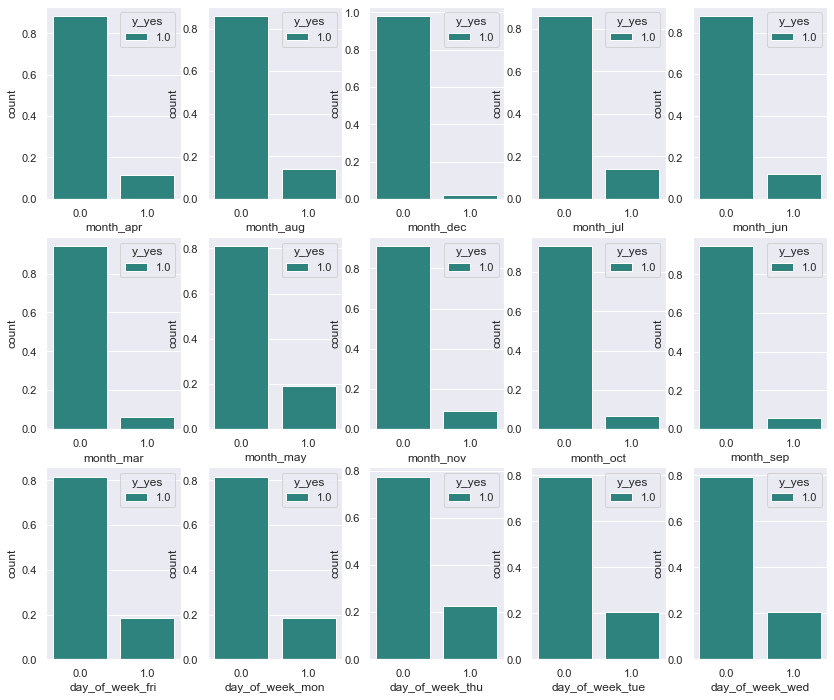

In [373]:
fig, axes = plt.subplots(3, 5, figsize=(14,12))
axes = [ax for axes_rows in axes for ax in axes_rows]

for i, c in enumerate(df[['month_apr', 'month_aug', 'month_dec', 'month_jul','month_jun', 
                          'month_mar', 'month_may', 'month_nov', 'month_oct','month_sep',
                         'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu','day_of_week_tue', 'day_of_week_wed']]):
    
    #index of rows where target_col value is 0.0
    fltr = df['y_yes']==0.0
    
    #dataframe conraining rows and columns where target_col value is 1.0
    #fltr-index of rows where target_col value is 0.0
    #c-column name
    #taking the value count
    #resetting index as column name
    
    vc_b=df[~fltr][c].value_counts(normalize=True).reset_index().rename({'index':c,c:'count'}, axis=1)
    
     #setting target_col value to 1.0 respectively
    vc_b['y_yes']=1.0
    
    #combining into single dataframe
    df4 = pd.concat([vc_b]).reset_index(drop=True)
    
    #plotting
    sns.barplot(y='count', x=c, data=df4, hue='y_yes', palette='viridis', ax=axes[i])

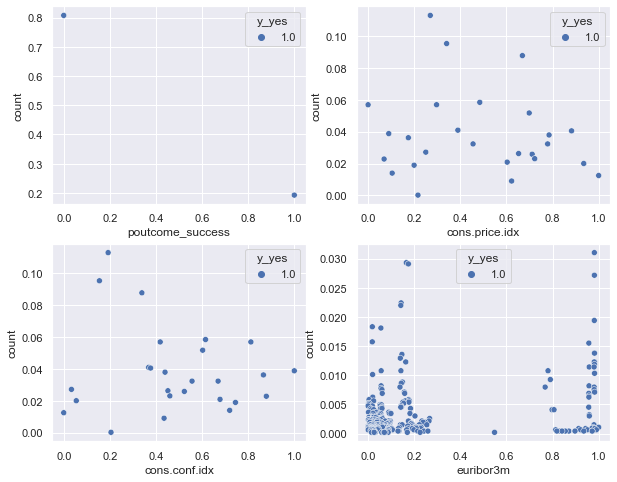

In [381]:
fig, axes = plt.subplots(2, 2, figsize=(10,8))
axes = [ax for axes_rows in axes for ax in axes_rows]

for i, c in enumerate(df[['poutcome_success','cons.price.idx', 'cons.conf.idx', 'euribor3m']]):

    #index of rows where target_col value is 0.0
    fltr = df['y_yes']==0.0

    #dataframe conraining rows and columns where target_col value is 1.0
     #fltr-index of rows where target_col value is 0.0
    #c-column name
    #taking the value count
    #resetting index as column name

    vc_b=df[~fltr][c].value_counts(normalize=True).reset_index().rename({'index':c,c:'count'}, axis=1)

    #setting target_col value to 1.0 respectively
    vc_b['y_yes']=1.0

    #combining into single dataframe
    df5 = pd.concat([vc_b]).reset_index(drop=True)

    #plotting
    sns.scatterplot(x=c, y="count", data=df5, hue='y_yes', ax=axes[i])
    
